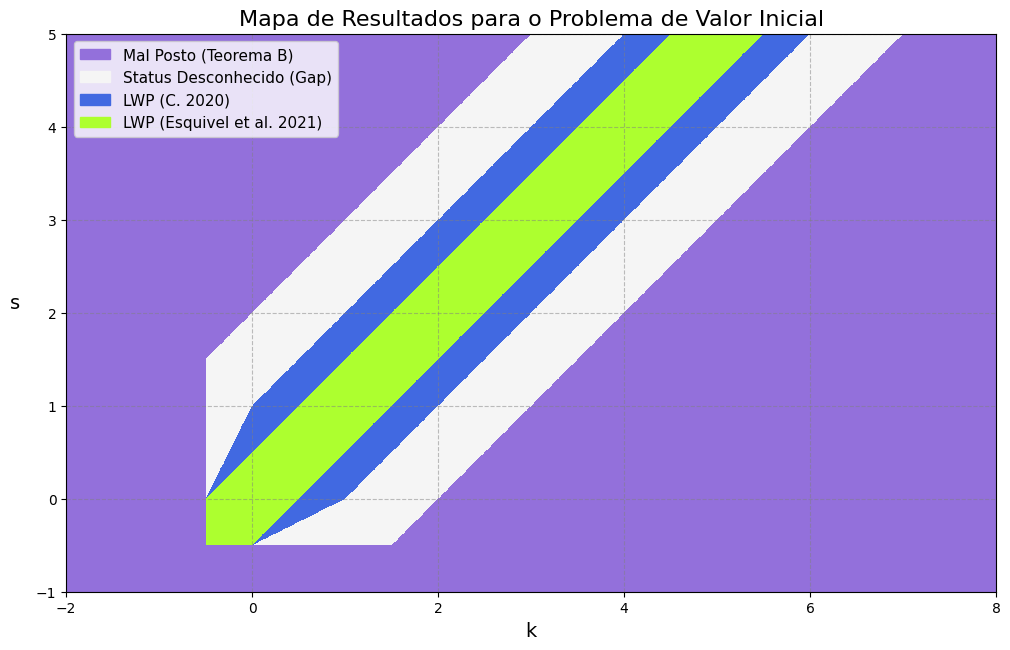

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

# --- 1. Definir o Grid de Alta Resolução ---
resolution = 2000
k = np.linspace(-2.5, 8.5, resolution)
s = np.linspace(-1.5, 5.5, resolution)
K, S = np.meshgrid(k, s)

# --- 2. Definir as Regiões com Base na Interpretação Correta ---
# 0: Mal Posto (Comprovado pelo Teorema B)
# 1: Status Desconhecido (Gap entre os teoremas)
# 2: LWP (Comprovado pelo Teorema A - C. 2020)
# 3: LWP (Comprovado pelo Teorema A - Esquivel et al. 2021)

# Começamos com a região desconhecida por padrão
Z = np.ones(K.shape, dtype=int) 

# Agora, definimos as regiões com status conhecido.
# Região Mal Posta (Teorema B)
cond_ill_posed = (np.abs(S - K) > 2) | (S < -0.5) | (K < -0.5)
Z[cond_ill_posed] = 0

# Domínio base para os resultados de LWP
cond_lwp_domain = (S >= -0.5) & (K >= -0.5)

# Região LWP - C. 2020
cond_c2020 = (np.abs(S - K) < 1) & (S - 2*K < 1) & (K - 2*S < 1) & cond_lwp_domain
Z[cond_c2020] = 2

# Região LWP - Esquivel et al. 2021 (sobrepõe a anterior onde aplicável)
cond_esquivel2021 = (np.abs(S - K) <= 0.5) & cond_lwp_domain
Z[cond_esquivel2021] = 3

# --- 3. Configurar Cores e Legenda Precisa ---
colors = {
    'Mal Posto (Teorema B)': '#9370DB',            # Roxo
    'Status Desconhecido (Gap)': 'whitesmoke',     # Quase branco
    'LWP (C. 2020)': '#4169E1',                    # Azul
    'LWP (Esquivel et al. 2021)': '#ADFF2F'        # Verde
}

# O mapa de cores precisa seguir a ordem dos números (0, 1, 2, 3)
cmap = ListedColormap([
    colors['Mal Posto (Teorema B)'],
    colors['Status Desconhecido (Gap)'],
    colors['LWP (C. 2020)'],
    colors['LWP (Esquivel et al. 2021)']
])

# Criar "proxy artists" para a legenda
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]

# --- 4. Criar o Gráfico ---
fig, ax = plt.subplots(figsize=(12, 8))

# Plotar as regiões coloridas
im = ax.pcolormesh(K, S, Z, cmap=cmap, shading='auto', rasterized=True)

# --- 5. Configurar a Aparência do Gráfico ---
ax.set_xlabel('k', fontsize=14)
ax.set_ylabel('s', fontsize=14, rotation=0, labelpad=15)
ax.set_title('Mapa de Resultados para o Problema de Valor Inicial', fontsize=16)
ax.set_xlim(-2, 8)
ax.set_ylim(-1, 5)
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
ax.set_aspect('equal', adjustable='box')

# Adicionar a legenda corrigida
ax.legend(handles=legend_patches, loc='upper left', fontsize=11)

plt.show()

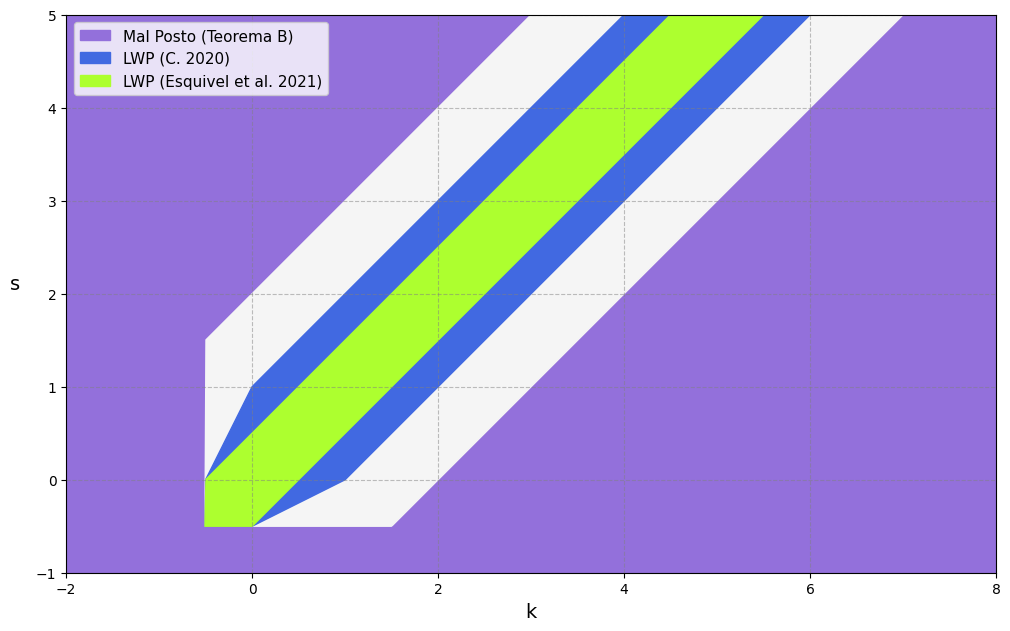

Gráfico salvo como 'mapa_de_resultados.pdf'


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- 1. Definir o eixo k e as Cores/Legendas ---
k = np.linspace(-2.5, 8.5, 1000)

colors = {
    'Mal Posto (Teorema B)': '#9370DB',
    'Status Desconhecido (Gap)': 'whitesmoke',
    'LWP (C. 2020)': '#4169E1',
    'LWP (Esquivel et al. 2021)': '#ADFF2F'
}

# --- 2. Criar o Gráfico e Definir o Fundo ---
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor(colors['Mal Posto (Teorema B)'])

# --- 3. Desenhar cada Região como um Polígono Vetorial ---

# Camada 1: Região de Status Desconhecido (Branca) - ainda desenhada
y_lower_unknown = np.maximum(k - 2, -0.5)
y_upper_unknown = k + 2
ax.fill_between(k, y_lower_unknown, y_upper_unknown,
                where=(k >= -0.5),
                color=colors['Status Desconhecido (Gap)'],
                interpolate=True)

# Camada 2: Região LWP C. 2020 (Azul)
y_lower_2020 = np.maximum(k - 1, k/2 - 0.5)
y_lower_2020_clipped = np.maximum(y_lower_2020, -0.5)
y_upper_2020 = np.minimum(k + 1, 2*k + 1)
ax.fill_between(k, y_lower_2020_clipped, y_upper_2020,
                where=(k >= -0.5),
                color=colors['LWP (C. 2020)'],
                interpolate=True)

# Camada 3: Região LWP Esquivel et al. 2021 (Verde)
y_lower_2021 = np.maximum(k - 0.5, -0.5)
y_upper_2021 = k + 0.5
ax.fill_between(k, y_lower_2021, y_upper_2021,
                where=(k >= -0.5),
                color=colors['LWP (Esquivel et al. 2021)'],
                interpolate=True)

# --- 4. Configurar Legenda e Aparência Final ---

# Criar "proxy artists" para a legenda, OMITINDO o "Status Desconhecido"
legend_items_to_show = {label: color for label, color in colors.items() if label != 'Status Desconhecido (Gap)'}
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_items_to_show.items()]

ax.set_xlabel('k', fontsize=14)
ax.set_ylabel('s', fontsize=14, rotation=0, labelpad=15)
ax.set_xlim(-2, 8)
ax.set_ylim(-1, 5)
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
ax.set_aspect('equal', adjustable='box')

ax.legend(handles=legend_patches, loc='upper left', fontsize=11)

# --- 5. Salvar o arquivo como PDF e depois exibi-lo ---
# Salva a figura em um arquivo chamado 'mapa_de_resultados.pdf' no mesmo diretório do script.
# bbox_inches='tight' remove excesso de borda branca.
plt.savefig('mapa_de_resultados.pdf', bbox_inches='tight')

# Exibir o gráfico na tela
plt.show()

print("Gráfico salvo como 'mapa_de_resultados.pdf'")